In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.metrics import confusion_matrix, accuracy_score

### EDA

In [2]:
data = pd.read_csv("voice.csv")

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


#### Eksik Gözlem Analizi

In [6]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

#### Aykırı Gözlem Analizi

In [7]:
lbe = preprocessing.LabelEncoder()

In [8]:
data["label"] = lbe.fit_transform(data["label"])

In [9]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [10]:
clf.fit_predict(data)

array([-1,  1, -1, ...,  1,  1,  1])

In [11]:
df_scores = clf.negative_outlier_factor_
df_scores[:10]

array([-1.22925368, -0.94291763, -1.18357637, -0.98332483, -1.04451091,
       -1.05599132, -1.05645882, -0.98048768, -1.06885942, -1.15762276])

In [12]:
np.sort(df_scores)[0:20]

array([-2.20382124, -2.0111685 , -2.01033872, -1.75892712, -1.72752947,
       -1.71545029, -1.71084493, -1.71051617, -1.70343049, -1.67120582,
       -1.65887215, -1.64836842, -1.60630255, -1.57248597, -1.55434834,
       -1.53846515, -1.53372352, -1.53217988, -1.53088088, -1.52710871])

In [13]:
threshold = np.sort(df_scores)[3]

In [14]:
outlier_df = df_scores > threshold

In [15]:
data[df_scores == threshold]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2387,0.20942,0.033055,0.208636,0.197301,0.225427,0.028126,3.384409,17.266035,0.829099,0.214757,...,0.20942,0.15469,0.048682,0.27907,1.99119,0.023438,15.023438,15.0,0.106473,0


In [16]:
new_value = data[df_scores == threshold]
outliers = data[~outlier_df]
res = outliers.to_records(index = False)
res[:] = new_value.to_records(index = False)
res

rec.array([(0.20942014, 0.03305502, 0.20863568, 0.19730135, 0.22542729, 0.02812594, 3.38440908, 17.26603519, 0.82909895, 0.21475692, 0.20863568, 0.20942014, 0.15468997, 0.04868154, 0.27906977, 1.99119016, 0.0234375, 15.0234375, 15., 0.10647321, 0),
           (0.20942014, 0.03305502, 0.20863568, 0.19730135, 0.22542729, 0.02812594, 3.38440908, 17.26603519, 0.82909895, 0.21475692, 0.20863568, 0.20942014, 0.15468997, 0.04868154, 0.27906977, 1.99119016, 0.0234375, 15.0234375, 15., 0.10647321, 0),
           (0.20942014, 0.03305502, 0.20863568, 0.19730135, 0.22542729, 0.02812594, 3.38440908, 17.26603519, 0.82909895, 0.21475692, 0.20863568, 0.20942014, 0.15468997, 0.04868154, 0.27906977, 1.99119016, 0.0234375, 15.0234375, 15., 0.10647321, 0),
           (0.20942014, 0.03305502, 0.20863568, 0.19730135, 0.22542729, 0.02812594, 3.38440908, 17.26603519, 0.82909895, 0.21475692, 0.20863568, 0.20942014, 0.15468997, 0.04868154, 0.27906977, 1.99119016, 0.0234375, 15.0234375, 15., 0.10647321, 0)],
   

In [17]:
#baskılama yöntemi
data[~outlier_df] = pd.DataFrame(res, index = data[~outlier_df].index)
data[~outlier_df]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
254,0.20942,0.033055,0.208636,0.197301,0.225427,0.028126,3.384409,17.266035,0.829099,0.214757,...,0.20942,0.15469,0.048682,0.27907,1.99119,0.023438,15.023438,15.0,0.106473,0
2026,0.20942,0.033055,0.208636,0.197301,0.225427,0.028126,3.384409,17.266035,0.829099,0.214757,...,0.20942,0.15469,0.048682,0.27907,1.99119,0.023438,15.023438,15.0,0.106473,0
2387,0.20942,0.033055,0.208636,0.197301,0.225427,0.028126,3.384409,17.266035,0.829099,0.214757,...,0.20942,0.15469,0.048682,0.27907,1.99119,0.023438,15.023438,15.0,0.106473,0
2793,0.20942,0.033055,0.208636,0.197301,0.225427,0.028126,3.384409,17.266035,0.829099,0.214757,...,0.20942,0.15469,0.048682,0.27907,1.99119,0.023438,15.023438,15.0,0.106473,0


In [18]:
scaler = preprocessing.StandardScaler()
data[["kurt", "meandom", "maxdom", "dfrange","skew"]] = scaler.fit_transform(data[["kurt", "meandom", "maxdom", "dfrange","skew"]])

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,1.809661e-01,0.029900,0.039363,0.163714,0.184852,0.199181,0.251124
sd,3168.0,5.708732e-02,0.016639,0.018363,0.041926,0.059130,0.066985,0.115273
median,3168.0,1.856685e-01,0.036352,0.010975,0.169623,0.190069,0.210618,0.261224
Q25,3168.0,1.405664e-01,0.048635,0.000229,0.111122,0.140313,0.176060,0.247347
Q75,3168.0,2.247801e-01,0.023635,0.042946,0.208758,0.225684,0.243660,0.273469
IQR,3168.0,8.421374e-02,0.042747,0.014558,0.042505,0.094203,0.114161,0.252225
skew,3168.0,0.000000e+00,1.000158,-0.715111,-0.353115,-0.221665,-0.045306,7.309372
kurt,3168.0,-8.971499e-18,1.000158,-0.256873,-0.229420,-0.209227,-0.168590,8.895937
sp.ent,3168.0,8.951176e-01,0.044988,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,4.080359e-01,0.177587,0.036876,0.257580,0.396039,0.533676,0.842936


### Modelleme

In [20]:
x = data.drop("label", axis = 1)
y = data["label"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
model = tf.keras.Sequential()

In [23]:
input_layer = tf.keras.layers.Dense(256, input_shape=(x.shape[1],), activation='relu')
model.add(input_layer)

In [24]:
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [25]:
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
model.add(output_layer)

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [27]:
results = model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


80/80 [==============================] - 1s 3ms/step - loss: 0.6153 - accuracy: 0.6650
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7818
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8485
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8875
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9187
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.9333
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9455
Epoch 8/50
80/80 [==============================] - 0s 3ms/step - loss: 0.1445 - accuracy: 0.9499
Epoch 9/50
80/80 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9483
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9574
Epoch 11/50
80/80

### Model Değerlendirme

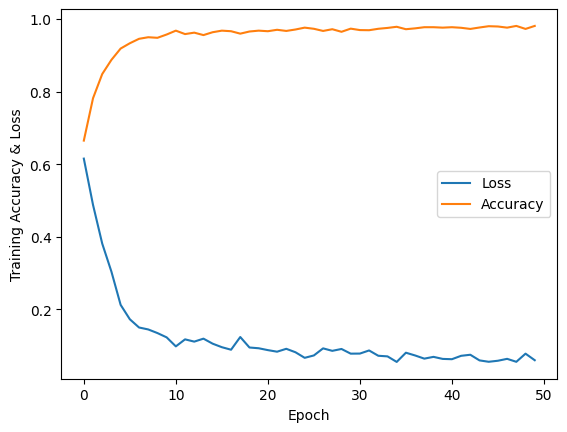

In [28]:
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['accuracy'], label='Accuracy')
plt.ylabel('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [29]:
test_result = model.test_on_batch(x_test, y_test)
print(f"Model's Test Loss: {test_result[0]}")
print(f"Model's Test Accuracy: {test_result[1]}")

Model's Test Loss: 0.09790222346782684
Model's Test Accuracy: 0.9668769836425781


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [31]:
y_pred = model.predict(x_test).round()

20/20 [==============================] - 0s 1ms/step


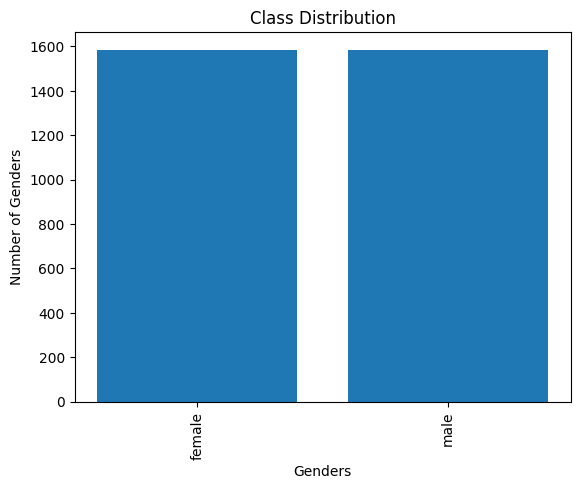

In [32]:
data["label"] = lbe.inverse_transform(data["label"])
unique_classes = np.unique(data["label"])
class_counts = data["label"].value_counts()
plt.bar(unique_classes, class_counts)
plt.xticks(rotation='vertical', ticks = unique_classes)
plt.xlabel('Genders')
plt.ylabel('Number of Genders')
plt.title('Class Distribution');

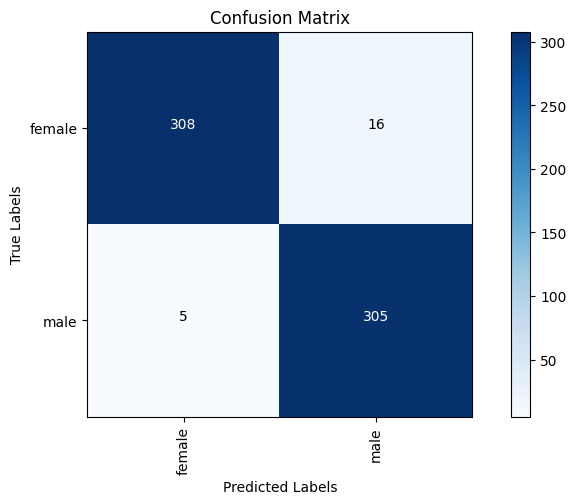

In [33]:
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(data["label"])
fig = plt.figure(figsize = (10,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation='vertical')
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [34]:
model.save("model.keras")